# Regresi Linier

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf
import seaborn as sns

df = pd.read_excel("./DATA/data.xlsx")

df

ID          Nama  Usia        Kota  Pendapatan       Status  \
0    118  Pengguna_118    51  yogyakarta     9819256        Aktif   
1     29   Pengguna_29    37     jakarta     4991886        Aktif   
2    119  Pengguna_119    31       medan    19094979        Aktif   
3     44   Pengguna_44    54    makassar    15843052  Tidak Aktif   
4    124  Pengguna_124    26     bandung    20000000      Pending   
..   ...           ...   ...         ...         ...          ...   
145    8    Pengguna_8    37    semarang    19033280        Aktif   
146   35   Pengguna_35    51    semarang    19193548        Aktif   
147   13   Pengguna_13    45    surabaya     3706063  Tidak Aktif   
148    1    Pengguna_1    29     jakarta    15682130        Aktif   
149   69   Pengguna_69    27  yogyakarta     7340883  Tidak Aktif   

    Tanggal Daftar  Tahun_Daftar  Bulan_Daftar  Hari_Daftar  
0       2023-06-26          2023             6           26  
1       2023-07-20          2023             7           20  
2       2023-05-17          2023             5           17  
3       2023-05-10          2023             5           10  
4       2023-05-05          2023             5            5  
..             ...           ...           ...          ...  
145     2023-03-30          2023             3           30  
146     2023-06-25          2023             6           25  
147     2023-09-20          2023             9           20  
148     2023-05-07          2023             5            7  
149     2023-12-02          2023            12            2  

[150 rows x 10 columns]

In [44]:
df = df.reset_index(drop=True)
df.index = df.index + 1

model = smf.ols("Pendapatan ~ Usia", data=df).fit()

intercept_usia_pendapatan = model.params["Intercept"]
slope_usia_pendapatan = model.params["Usia"]

ssr_usia_pendapatan = model.ssr

print(f"Jumlah kuadrat Residual (SSR) untuk model Pendapatan vs Usia adalah {ssr_usia_pendapatan}")
print(f"Persamaan Garis Regresi Usia vs Pendapatan adalah {intercept_usia_pendapatan} + {slope_usia_pendapatan} * Usia")

Jumlah kuadrat Residual (SSR) untuk model Pendapatan vs Usia adalah 3596284929633566.5
Persamaan Garis Regresi Usia vs Pendapatan adalah 11549519.07446251 + 9784.559879941478 * Usia


# Visualisasi Distribusi

Hasil uji Shapiro-Wilk untuk Pendapatan adalah ShapiroResult(statistic=np.float64(0.9560822904228123), pvalue=np.float64(0.00010863260534737519))
Distribusi Pendapatan tidak mengikuti distribusi normal (tolak H0)


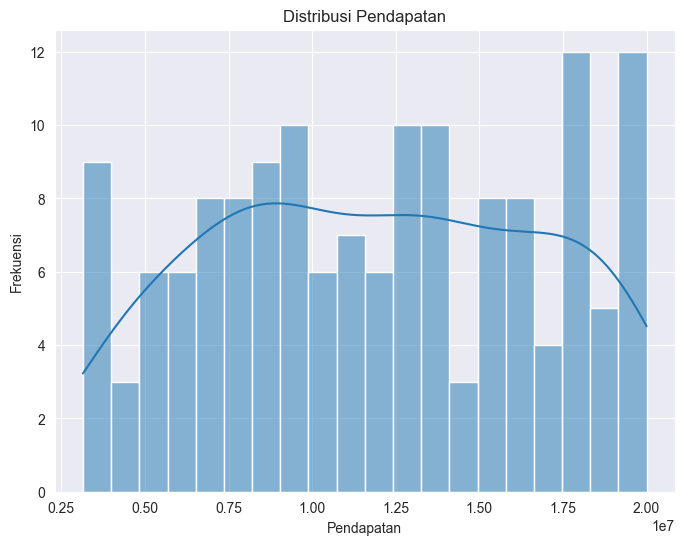

In [46]:
shapiro_test = stats.shapiro(df["Pendapatan"])

print(f"Hasil uji Shapiro-Wilk untuk Pendapatan adalah {shapiro_test}")

alpha = 0.05

if shapiro_test.pvalue > alpha:
    print("Distribusi Pendapatan mengikuti distribusi normal (gagal tolak H0)")
else:
    print("Distribusi Pendapatan tidak mengikuti distribusi normal (tolak H0)")

plt.figure(figsize=(8, 6))
sns.histplot(df["Pendapatan"], kde=True, bins=20)
plt.title("Distribusi Pendapatan")
plt.xlabel("Pendapatan")
plt.ylabel("Frekuensi")
plt.show()